In [ ]:
#%matplotlib notebook

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import csv
#import os
#import sys

#import re
import glob
#import plotly.graph_objects as go
#from scipy.stats import linregress
#from matplotlib import pyplot as plt


In [57]:
# Create dataframe from previously cleaned Housing .csv used by team

AllHousing_Merged = "Clean Data\Housing data by values\Housing_data_clean_merged.csv"
AllHousing_Merged_DF = pd.read_csv(AllHousing_Merged)

#Options to use different chart stylings, if needed
plt.style.use('default')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')
#plt.style.available

#Plot color/map options available, if needed
#colormap='Pastel2'
#plasma,inferno,magma,twilight_shifted,twilight,Pastel2,Pastel1,flag,viridis
#Options: colors = ("orange", "cyan", "green", "grey", "indigo", "lightyellow", "darkred", "darkgreen", "black",
# "beige", "brown", "lightgreen", "red", "magenta", "pink", "lightblue","darkblue", "teal","white")

In [58]:

# Function that gets and returns the user's search citeria of STATE and Bedroom Size 'filter' to create future variables.

# Defining the Function
def StateInput():
    # Global to enable variable to be used outside of function in code
    global WhatState
    
    # Boolean checks for Funtion iteration    
    InterestedStill = True
    ContinueOn = False
    ViewAllTypes = False
    
    # Local variables initialized
    WhatState = "XX"
    WhatUnitType = "xx_0_xx"
    WhatRoomType = "Housing"
    
    # List of states to check allowed inputs against
    states = (["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI",
          "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI",
          "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC",
          "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT",
          "VT", "VA", "WA", "WV", "WI", "WY"])

    # User input to get desired State data   
    WhatState = str(input("Which STATE are you interested in viewing data on? 'XX'" "\n"))
    while InterestedStill:
        # Changes all string inputs to uppercase to check against 'states' list 
        WhatState = WhatState.upper()
        # If an input does not equal a State abbreviation
        if WhatState not in states:
            YesOrNo = str(input("The State abbreviation code you entered is not a valid choice. Would you like to try it again? (Y)/(N)?"))
            YesOrNo = YesOrNo.upper()
            if YesOrNo == "N":
                print("Thank you. Goodbye. Exiting search...")
                InterestedStill = False
                break  # Exits function
            
            elif YesOrNo == "Y":
                InterestedStill = True
                StateInput() # Re loops function
            
            else:
                print("Please follow instructions and try again.")
                InterestedStill = False
                break # Automatically Exits function
        else:
            WhatState = WhatState.upper()
            InterestedStill = False
            ContinueOn = True
            RoomInput() # Calls 2nd function once successfully here

        return


def RoomInput():
    
    # Function to get variable for specific type of Housing option
    global WhatUnitType
    global WhatRoomType
    global ViewAllTypes

    ContinueOn = True
    ViewAllTypes = False
    WhatRoomType = "Housing"
    WhatUnitType = "xx_0_xx"

    # List of only allowed inputs from user
    rooms = ["1","2","3","4","5","C"]
                            
                            
    WhatUnitType = str(input("Thanks! Please enter the Bedrooms size/units to view: (1), (2), (3), (4), (5) Bedrooms of (C) - Condo."))
    while ContinueOn: 
        # Repeats much of the code format above for consistency                                             
        WhatUnitType = WhatUnitType.upper()
        if WhatUnitType not in rooms:
            YesOrNo = str(input("The Housing / Bedrooms option you entered is not valid. Would you like to try it again? (Y) / (N)?"))
            YesOrNo = YesOrNo.upper()
            if YesOrNo == "N":
                print("Thank you. Goodbye. Exiting search...")
                ContinueOn = False
                break
            
            elif YesOrNo == "Y":
                ContinueOn = True
                RoomInput()
            
            else:
                print("Please follow instructions and try again.")
                ContinueOn = False
                break
        
        # Once successful inputs occur, the 'WhatUnitType' and 'WhatRoomType' variable is set prior to Function exit
        else:
            # Changes all number inputs to strings for check
            WhatUnitType = str(WhatUnitType)
            
            # 'WhatUnitType' will now equal values that will allow us to get specific data more quickly
            # 'WhatRoomType' will be used in chart titles and other print messages 
            if WhatUnitType == "1":
                WhatRoomType = "1-Bedrooms"
                WhatUnitType = "Data_1_bed"
                ContinueOn = False
            
            elif WhatUnitType == "2":
                WhatRoomType = "2-Bedrooms"
                WhatUnitType = "Data_2_bed"
                ContinueOn = False
            
            elif WhatUnitType == "3":
                WhatRoomType = "3-Bedrooms"
                WhatUnitType = "Data_3_bed"
                ContinueOn = False
            
            elif WhatUnitType == "4":
                WhatRoomType = "4-Bedrooms"
                WhatUnitType = "Data_4_bed"
                ContinueOn = False
            
            elif WhatUnitType == "5":
                WhatRoomType = "5-Bedrooms"
                WhatUnitType = "Data_5_bed"
                ContinueOn = False
            
            elif WhatUnitType == "C":
                WhatRoomType = "Condos"
                WhatUnitType = "Data_condo"
                ContinueOn = False
            
            else:       # Safety Else to reloop 
                print(f"Please try a different room selection for {WhatState}.")
                WhatRoomType = "Housing"
                StateInput()
                ContinueOn = False

        return



# Start/call of function
StateInput()


In [59]:
#Displays floats with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

# Print message to user (and coder) on what variables are set as currently 
print(f"Thank you for your selections!") 
print(f"We will be reviewing specific Average Property Values for {WhatRoomType} in {WhatState}, and observing overall trends from 2010-2020.")

Thank you for your selections!
We will be reviewing specific Average Property Values for 2-Bedrooms in AK, and observing overall trends from 2010-2020.


In [60]:
# BEFORE: Cleaned Dataframe data that will be used as 'groupby' base
AllHousing_Merged_DF.head(6)

,State,CountyName,Housing Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NY,New York County,Data_1_bed,524230.33,572724.58,577255.17,601978.33,652846.00,692174.33,707325.42,736360.25,731432.75,702898.83,685897.33
1,IL,Cook County,Data_1_bed,211172.75,192259.83,178664.08,188592.92,204526.83,205508.17,209737.25,216489.17,220843.92,217292.50,219304.00
2,NY,New York County,Data_1_bed,623403.75,653817.67,661195.17,712712.50,808760.17,845258.83,855036.17,845226.42,823293.50,788139.58,765217.33
3,IL,Cook County,Data_1_bed,234486.42,219276.25,207400.75,219404.67,231354.75,236109.92,241497.33,248256.42,251728.92,249244.58,247461.33
4,TX,Harris County,Data_1_bed,95503.25,87770.00,80351.83,86292.58,97141.00,109236.25,117556.75,120752.42,128352.42,134669.08,140585.33
5,NY,New York County,Data_1_bed,440757.83,478302.50,468081.42,499638.75,528198.83,591591.58,676982.75,717912.08,720380.17,683216.83,691528.00


In [61]:
#AFTER: GroupBy of 'State' and 'Housing Type' data/columns together. Average is taken to help produce the Average Property Value (AVP) 
GroupByStateHousing = AllHousing_Merged_DF.groupby(["State","Housing Type"]).mean()
GroupByStateHousing.head(6)


2010      2011      2012      2013      2014  \
State Housing Type                                                     
AK    Data_1_bed   144214.07 142595.90 142863.49 143595.84 146893.14   
      Data_2_bed   178091.47 175950.70 178132.17 182543.27 186575.31   
      Data_3_bed   227330.43 225111.91 227549.96 232434.96 237526.48   
      Data_4_bed   303840.64 301867.05 305626.06 313451.88 318921.59   
      Data_5_bed   362620.78 355929.43 359816.86 368160.76 375656.74   
      Data_condo   185702.29 183111.32 185545.61 189041.72 193994.98   

                        2015      2016      2017      2018      2019      2020  
State Housing Type                                                              
AK    Data_1_bed   150971.46 153640.67 155775.12 157468.69 164982.08 171235.26  
      Data_2_bed   192299.76 196009.93 196230.48 197915.47 207043.85 215242.89  
      Data_3_bed   244686.47 249175.50 250928.06 254101.85 264835.51 272788.04  
      Data_4_bed   327553.33 334174.55 334868.30 337341.51 353173.82 364289.24  
      Data_5_bed   387131.06 392920.63 393647.54 398377.91 411668.21 421496.19  
      Data_condo   198385.05 200440.74 200168.27 201373.13 209306.76 214857.73

In [62]:
# Check code to make sure values match up
print(WhatState)
print(WhatUnitType)
print()
print(GroupByStateHousing["2010"][WhatState])

GroupByStateHousing.head(6)

AK
Data_2_bed

Housing Type
Data_1_bed   144214.07
Data_2_bed   178091.47
Data_3_bed   227330.43
Data_4_bed   303840.64
Data_5_bed   362620.78
Data_condo   185702.29
Name: 2010, dtype: float64


2010      2011      2012      2013      2014  \
State Housing Type                                                     
AK    Data_1_bed   144214.07 142595.90 142863.49 143595.84 146893.14   
      Data_2_bed   178091.47 175950.70 178132.17 182543.27 186575.31   
      Data_3_bed   227330.43 225111.91 227549.96 232434.96 237526.48   
      Data_4_bed   303840.64 301867.05 305626.06 313451.88 318921.59   
      Data_5_bed   362620.78 355929.43 359816.86 368160.76 375656.74   
      Data_condo   185702.29 183111.32 185545.61 189041.72 193994.98   

                        2015      2016      2017      2018      2019      2020  
State Housing Type                                                              
AK    Data_1_bed   150971.46 153640.67 155775.12 157468.69 164982.08 171235.26  
      Data_2_bed   192299.76 196009.93 196230.48 197915.47 207043.85 215242.89  
      Data_3_bed   244686.47 249175.50 250928.06 254101.85 264835.51 272788.04  
      Data_4_bed   327553.33 334174.55 334868.30 337341.51 353173.82 364289.24  
      Data_5_bed   387131.06 392920.63 393647.54 398377.91 411668.21 421496.19  
      Data_condo   198385.05 200440.74 200168.27 201373.13 209306.76 214857.73

In [63]:
# List that will hold the totals returned by Groupby append below
AveragePropertyValuePerHousing = []

# Variables/list created in case only the years 2010-2017 would be used in analyis to match other team members. 
# Diaster records and other were not available for other parts of the research.
#YearsForDataTruncate = [2010,2011,2012,2013,2014,2015,2016,2017]
#units = ["Data_1_bed", "Data_2_bed", "Data_3_bed", "Data_4_bed", "Data_5_bed", "Data_condo"] 

# To be used for x-axis length in many charts depending on the data to be returned/tick
YearsForDecade = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
TypesofHousing = ["1-Bedrooms", "2-Bedrooms", "3-Bedrooms", "4-Bedrooms", "5-Bedrooms", "Condos"]


plot_X_axisYears = np.arange(len(YearsForDecade))
plot_X_axisRooms = np.arange(len(TypesofHousing))
barWidth = 0.25

# Manual State/Houseing data append using the variables we got from user/function.
# This will be used for the values portion of charts and append the AVP for the specific room type for the decade 
AveragePropertyValuePerHousing.append(GroupByStateHousing["2010"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2011"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2012"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2013"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2014"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2015"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2016"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2017"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2018"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2019"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2020"][WhatState][WhatUnitType])

# Checking on returned values. 
print(WhatState)
print(WhatUnitType)
AveragePropertyValuePerHousing

AK
Data_2_bed


[178091.46666666667,
 175950.7020833333,
 178132.17291666663,
 182543.26874999996,
 186575.30625,
 192299.7645833333,
 196009.9270833333,
 196230.48333333334,
 197915.47083333333,
 207043.8520833333,
 215242.8875]

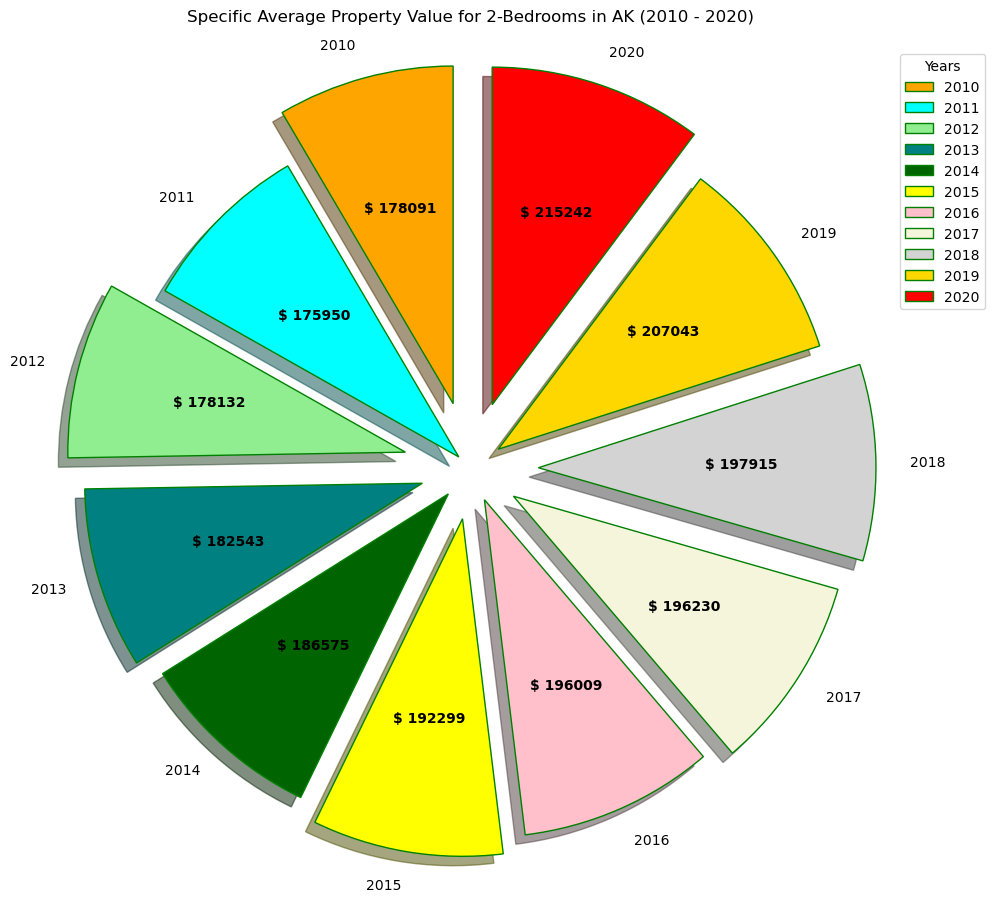

In [64]:
# Generating a pie chart that will show the specified Room/Housing Types's AVP over the decade to see variations year to year.
# Pie chart design suggested by professor that will be repurposed for displaying overall AVP info for a state, and over AVP info for a housing type over 2010-2020

# For labels
YearsForDecade = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]  

# AVP
data = AveragePropertyValuePerHousing
  
  
# Creating explode data for style and differentiation with 2nd pie chart 
explode = (0.2, 0.05, 0.2, 0.15, 0.1, 0.15, 0.1, 0.15, 0.2, 0.1, 0.2) 
  
# Creating color parameters 
colors = ("orange", "cyan", "lightgreen", "teal", "darkgreen",   
          "yellow", "pink", "beige", "lightgrey", "gold", "red")        

# Optional colors: "orange", "cyan", "green", "grey", "indigo", "lightyellow", "darkred", "darkgreen", "black"
# "beige", "brown", "lightgreen", "red", "magenta", "pink", "lightblue","darkblue", "teal","white"

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "$ {:d}".format(absolute)
    #return "{:.1f}%\n$ ({:d})".format(pct, absolute) 
    # Returning just the dollar sign on labeling 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 10)) # adjusted fig size
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = YearsForDecade, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, YearsForDecade, 
          title ="Years", 
          loc ="best",
          bbox_to_anchor =(1, 0, 0, 1)) # bbox_to_anchor =(1, 0, 0.5, 1) 
            # Adjusted legend placement to be closer to pie for savfig.        

plt.setp(autotexts, size = 10, weight ="bold")      # weight ="bold", is an option for Bold font
ax.set_title(f"Specific Average Property Value for {WhatRoomType} in {WhatState} (2010 - 2020)" "\n", color="black")   
# Concatanation to create saved image's filename using the values we derived from user input section.

plt.tight_layout()

plt.savefig(f"Outputs/Pie_AvgPropVal_{WhatState}_2010-2020_SpecificType.jpg", dpi=200)
# Saving clear/quality image for use and analysis, opting out of .png. 

# show plot 
plt.show()

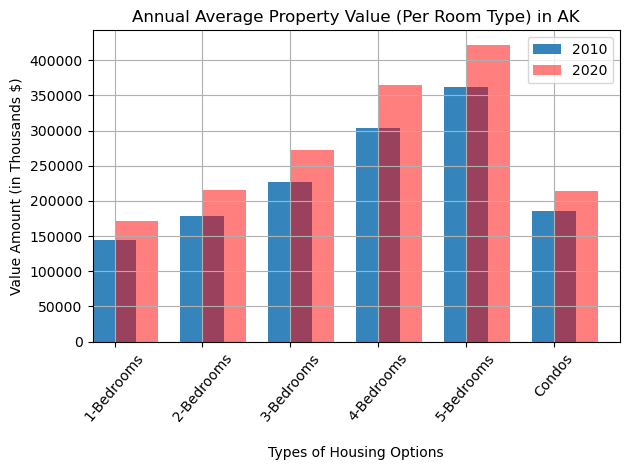

In [65]:

# Plotting a double bar graph to show all types of rooms' AVP simultaneously for both the year 2010 (start of recession) and 2020(present) to see changes. 
# Doing a manual static lookup from the just the years '2010' and '2020'. These represent the start and end of decade
# Using a 2nd bar graph plot, and offseting the alignment/color/alpha, gives a nice effect to show both datapoints on one chart.
GroupByStateHousing[("2010")][WhatState].plot(kind='bar', alpha=0.9, align="center")
GroupByStateHousing[("2020")][WhatState].plot(kind='bar', color='r', alpha=0.5, align="edge")
plt.legend(loc="best")
plt.legend(loc="best")
plt.grid()
plt.title(f"Annual Average Property Value (Per Room Type) in {WhatState}")   # Dynamic Title
plt.xlabel("\n" "Types of Housing Options")
plt.ylabel("Value Amount (in Thousands $)")

plt.xticks(plot_X_axisRooms, labels=TypesofHousing, rotation="50")

plt.tight_layout()

plt.savefig(f"Outputs/Bar_AvgPropValSummary_{WhatState}_2010_2020_SpecificType.jpg", dpi=200)

plt.show()

In [66]:
# Creating New Dataframe, this time of just grouping by 'State'
GroupByJustState = AllHousing_Merged_DF.groupby(["State"]).mean()
GroupByJustState.head(2)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
AK,231445.06,228717.82,231169.96,236093.23,241064.58,247966.00,252271.47,253235.34,255738.71,266552.22,274801.00
AL,155498.91,149301.99,147113.69,148191.85,150574.62,153680.91,156818.24,161698.78,168549.34,175482.06,183986.25


In [67]:
# Same code format as previous groupby, appending just for State AVP
AveragePropertyValueJustState = []


#YearsForDecade = [2010,2011,2012,2013,2014,2015,2016,2017]
YearsForDecade = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]

plot_X_axisYears = np.arange(len(YearsForDecade))
barWidth = 0.25

# Manual state data appended
AveragePropertyValueJustState.append(GroupByJustState["2010"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2011"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2012"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2013"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2014"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2015"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2016"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2017"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2018"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2019"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2020"][WhatState])

# Output for values check
AveragePropertyValueJustState

[231445.0603582556,
 228717.8235981307,
 231169.9563862929,
 236093.2340342679,
 241064.5817757009,
 247966.00077881623,
 252271.46806853596,
 253235.3356697819,
 255738.71378504674,
 266552.21573208726,
 274801.0003894079]

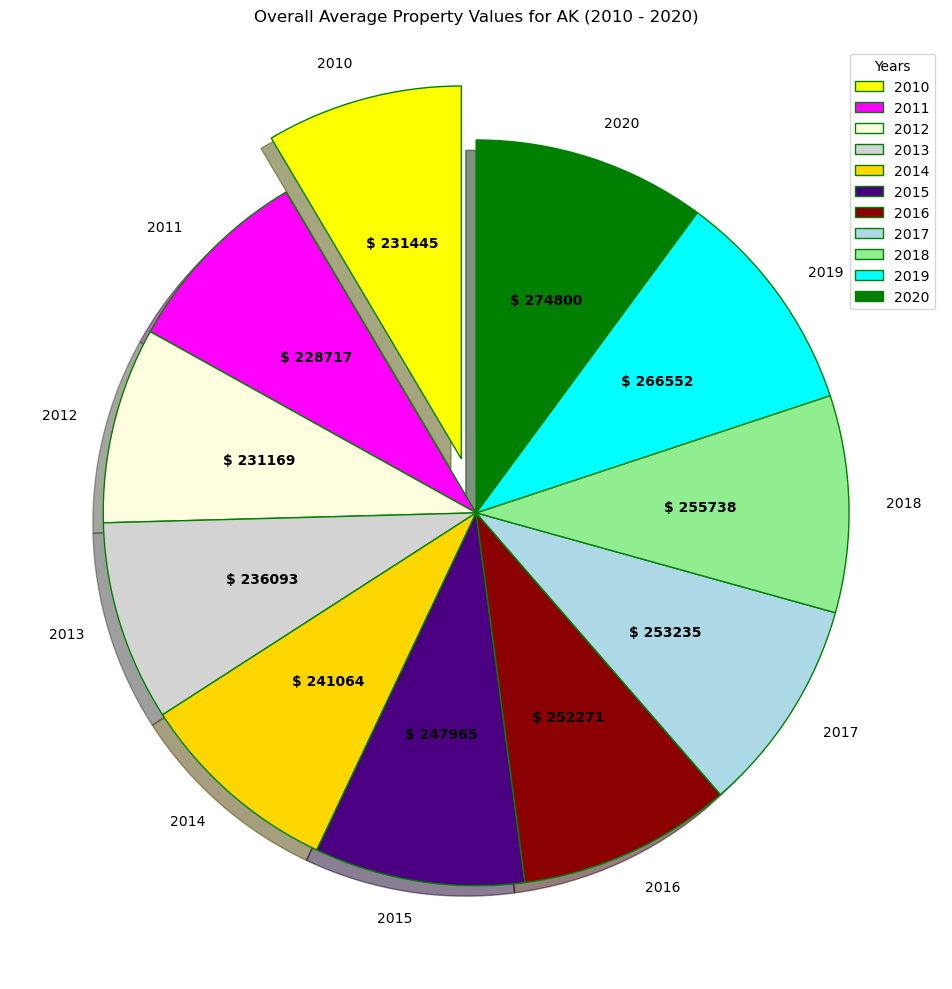

In [68]:

# Same code format as previous pie chart for consistency of graphs. Changed the 'explode' values to be more circular and the color pattern/combo

#TypesofHousing = ["1-Bedrooms", "2-Bedrooms", "3-Bedrooms", "4-Bedrooms", "5-Bedrooms", "Condos"] 
YearsForDecade = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]  
data = AveragePropertyValueJustState
  
  
# Creating explode data 
explode = (0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 
  
# Creating color parameters 
#colors = ("orange", "cyan", "lightgreen", "teal", "darkgreen",   
#          "yellow", "pink", "beige", "lightgrey", "gold", "red")

colors = ("yellow", "magenta", "lightyellow", "lightgrey", "gold", "indigo",
        "darkred", "lightblue", "lightgreen", "aqua", "green")   
                   

# Options: "orange", "cyan", "green", "grey", "indigo", "lightyellow", "darkred", "darkgreen", "black"
# "beige", "brown", "lightgreen", "red", "magenta", "pink", "lightblue","darkblue", "teal","white"

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "$ {:d}".format(absolute)
    #return "{:.1f}%\n$ ({:d})".format(pct, absolute)  
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = YearsForDecade, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, YearsForDecade, 
          title ="Years", 
          loc ="best", 
          bbox_to_anchor =(1, 0, 0, 1)) 
  
plt.setp(autotexts, size = 10, weight ="bold") # weight ="bold", is an option for Bold font
#ax.set_title(f"Total Average Property Values for {WhatState} (2010 - 2020)" "\n", color="black")   
ax.set_title(f"Overall Average Property Values for {WhatState} (2010 - 2020)" "\n", color="black")

plt.tight_layout()
plt.savefig(f"Outputs/Pie_AvgPropVal_{WhatState}_2010-2020_Overall.jpg", dpi=200)
# show plot 
plt.show()

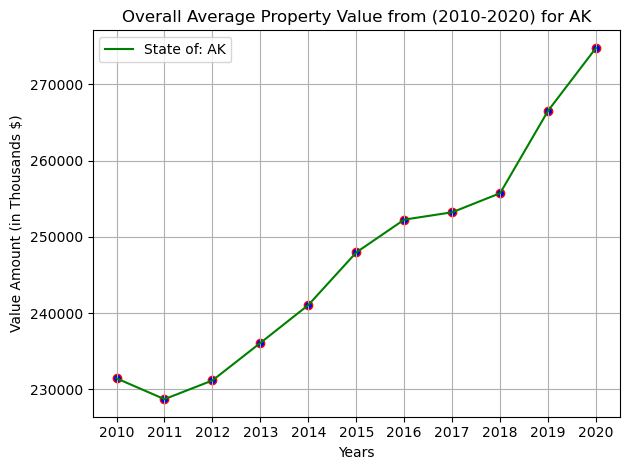

In [70]:
# Taking the concept of a double plot as before with the bar, for style, adding a line chart with a scatter plot overlay to show a State's overall AVP for the decade.
# This data is already represent in another fashion, but it mimics one a 'Disaster' data graph that is created by a team member. Keeping for future analysis and consistency. 

plt.plot(plot_X_axisYears, AveragePropertyValueJustState, color = "g", label=f"State of: {WhatState}")
plt.scatter(plot_X_axisYears, AveragePropertyValueJustState, color = "b", alpha=1, edgecolor="red")

plt.legend(loc="upper left")
plt.grid()
plt.title(f"Overall Average Property Value from (2010-2020) for {WhatState}")
plt.xlabel("Years")
plt.ylabel("Value Amount (in Thousands $)")


plt.xticks(plot_X_axisYears, labels=YearsForDecade)

plt.tight_layout()
plt.savefig(f"Outputs/Line__AvgPropVal_{WhatState}_2010-2020_Overall.jpg", dpi=200)

plt.show()

In [71]:
# Testing script/code to bring around the code to test values and variable designations.
# Commented out

#Test1 =  GroupByStateHousing["2010"][WhatState]
#Test2 =  GroupByStateHousing["2010"][WhatState][WhatUnitType]
#
#print()
#print(WhatState)
#print(WhatRoomType)
#print()
#print(Test1)
#print(f"This value: {Test2} - should be the AVP amount listed above for '{WhatUnitType}'.")
#print()
#
#
#print(f"Specific Average Property Value for {WhatRoomType} in {WhatState} (every year from 2010-2012):")
#print(AveragePropertyValuePerHousing)
#print("")
#
#print(f"\n Overall Average Property Value for '{WhatState}' (every year from 2010-2012):")
#AveragePropertyValueJustState


AK
2-Bedrooms

Housing Type
Data_1_bed   144214.07
Data_2_bed   178091.47
Data_3_bed   227330.43
Data_4_bed   303840.64
Data_5_bed   362620.78
Data_condo   185702.29
Name: 2010, dtype: float64
This value: 178091.46666666667 - should be the AVP amount listed above for 'Data_2_bed'.

Specific Average Property Value for 2-Bedrooms in AK (every year from 2010-2012):
[178091.46666666667, 175950.7020833333, 178132.17291666663, 182543.26874999996, 186575.30625, 192299.7645833333, 196009.9270833333, 196230.48333333334, 197915.47083333333, 207043.8520833333, 215242.8875]


 Overall Average Property Value for 'AK' (every year from 2010-2012):


[231445.0603582556,
 228717.8235981307,
 231169.9563862929,
 236093.2340342679,
 241064.5817757009,
 247966.00077881623,
 252271.46806853596,
 253235.3356697819,
 255738.71378504674,
 266552.21573208726,
 274801.0003894079]

In [ ]:
# _____________________________________________________________________________________________________________________________________________________________ #

In [ ]:
# Ithamar Francois